The flow is subcritical. The control for this channel is downstream (at the bridge).
The depth at the water treatment plant is  7.024070524591079 feet.
7.024070524591079
51796.0
The maximum allowable depth at the water treatment plant is  7.09696 feet.
The water treatment plant will not flood.
The water treatment plant will flood if the backup at the bridge causes the water level to increase by 6.2690399999999995 from normal depth for Q=925 cfs.
The water level is the maximum allowable depth for the water treatment plant 22352.716649508686 feet upstream of the bridge.
This point is 851.2833504913142 feet downstream of the water treatment plant.


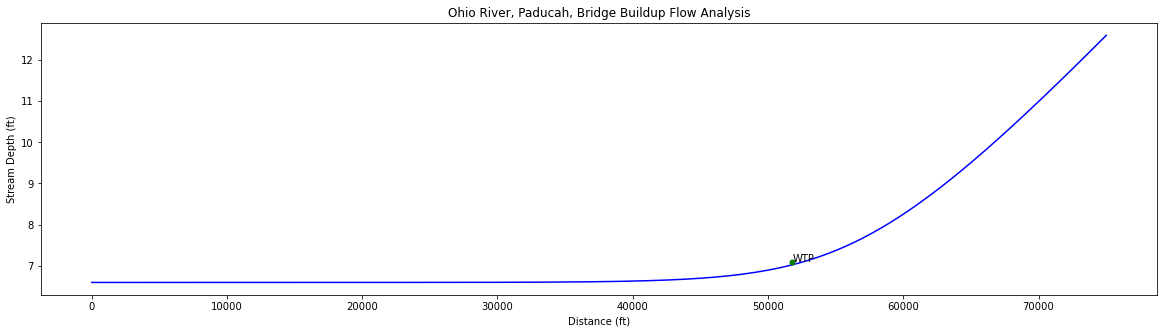

In [19]:
yn=6.59696                              # yn is normal depth for given flowrate(925)
y=yn+6                                  # y at the bridge is normal depth + 6 feet
b=22                                    # b is the width of the base of the trapezoidal channel
m=3                                     # m is the side slope
h=-500                                  # h is stepsize
Q=925                                   # Q is flowrate
n=0.022                                 # n is manning's coefficient
Snaught=0.00035                         # Snaught is the slope of the channel
Cm=1.486                                # Cm is manning's coefficient
g=32.2                                  # gravity in feet per second squared
A=b*y+m*y**2                            # A (area) for a trapezoidal channel with given bottom width, depth, and side slope
P=b+2*y*(1+m**2)**(1/2)                 # P (wetted perimeter) for a trapezoidal channel with given bottom width, depth, and side slope
T=b+2*m*y                               # T (top width) for a trapezoidal channel with given bottom width, depth, and side slope
V=Q/A                                   # V (velocity) is given by flowrate over area
c=(g*y)**(1/2)                          # c (wave speed) is given by the square root of the product of gravity and depth

# since the Freud number is given by V/c, and Fr>1 indicates supercritical flow,
# and Fr<1 indicates subcritical flow, an if loop can give us what kind of flow
# we are dealing with, and how the flow profile should be calculated (with which control)

if V > c:
    print("The flow is supercritical. The control for this channel is upstream (at the WTP).")
elif c > V:
    print("The flow is subcritical. The control for this channel is downstream (at the bridge).")
    
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# build an array with the initial y-value (y at the bridge)

y=[y]

# build an array from 75000 to 0 with a stepsize of h

x=np.arange(75000,-1,h)
 
length = len(x)-1

# find location of water treatment plant

wtp_location=x[1]-4.3*5280

# for loop - heun's method to solve the ordinary differential equation and place results into y-array

for i in range(length):
    A=b*y[i]+m*y[i]**2                                                            # Area
    P=b+2*y[i]*(1+m**2)**(1/2)                                                    # Wetted Perimeter
    T=b+2*m*y[i]                                                                  # Top width
    # dydx = (So-Sf)/(1-Fr^2)
    dydx=(Snaught-(Q*n*P**(2/3))**2/(Cm*A**(5/3))**2)/(1-(Q**2*T/(g*A**3)))       

    y_prime=y[i]+h*dydx                                                           # y' from Euler's method
    A_prime=b*y_prime+m*y_prime**2                                                # recalculation of area with y'
    P_prime=b+2*y_prime*(1+m**2)**(1/2)                                           # recalculation of wetted perimeter with y'
    T_prime=b+2*m*y_prime                                                         # recalculation of top width with y'
    # recalculation of dydx with y'
    dydx_prime=(Snaught-(Q*n*P_prime**(2/3))**2/(Cm*A_prime**(5/3))**2)/(1-(Q**2*T_prime/(g*A_prime**3)))
    
    # heun's method of ODE solution
    y_value=y[i]+h/2*(dydx_prime+dydx)
    
    # add value to the end of the y array
    y.append(y_value)
    
#print(x,y)



wtp_depth=-(x[47]-wtp_location)*(y[47]-y[48])/(x[47]-x[48])+y[47]
print("The depth at the water treatment plant is ", wtp_depth, "feet.")

max_depth_wtp=yn+0.5

print(wtp_depth)
print(wtp_location)
print("The maximum allowable depth at the water treatment plant is ", max_depth_wtp, "feet.")

if wtp_depth > max_depth_wtp:
    print("The water treatment plant will flood.")
else:
    print("The water treatment plant will not flood.")
    alt_bridge_backup=12.866-yn
    print("The water treatment plant will flood if the backup at the bridge causes the water level to increase by", alt_bridge_backup, "from normal depth for Q=925 cfs.")

    
# plot the figure

plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(x, y, 'b-')
plt.title("Ohio River, Paducah, Bridge Buildup Flow Analysis")
plt.xlabel("Distance (ft)")
plt.ylabel("Stream Depth (ft)")
plt.annotate("WTP", (wtp_location, max_depth_wtp))
plt.plot(wtp_location, max_depth_wtp, marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")


xatpoint=-(y[46]-7.09696)*(x[46]-x[47])/(y[46]-y[47])+x[46]

xvalue=75000-xatpoint
xwtpvalue=xatpoint-wtp_location

print("The water level is the maximum allowable depth for the water treatment plant", xvalue, "feet upstream of the bridge.")
print("This point is", xwtpvalue, "feet downstream of the water treatment plant.")

